In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
from api import api_key


In [22]:
# Get census Data using census API 

def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:],columns=response.json()[0])
url_2017 = "https://api.census.gov/data/2017/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B03001_001E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"
url_2019 = "https://api.census.gov/data/2019/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B03001_001E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"
url_2021 = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B03001_001E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"

response=requests.request("GET",url_2017)
response1=requests.request("GET",url_2019)
response2=requests.request("GET",url_2021)


In [23]:
# Save to a dataframe
census_2017_df = pd.DataFrame(json_to_dataframe(response))
census_2019_df = pd.DataFrame(json_to_dataframe(response1))
census_2021_df = pd.DataFrame(json_to_dataframe(response2))

# drop redundant columns
census_2017_df = census_2017_df.drop(['state', 'county'], axis=1)
census_2019_df = census_2019_df.drop(['state', 'county'], axis=1)
census_2021_df = census_2021_df.drop(['state', 'county'], axis=1)
   

In [24]:
# Rename columns
census_2017_df = census_2017_df.rename(
    columns={
      "B01003_001E": "Population 2017",
      "B06011_001E": "Median Income 2017",
      "B23025_005E": "Unemployed for ages>=16 2017",
      "B02001_002E": "Race: White 2017",
      "B02001_003E": "Race: Black or African American 2017",
      "B03001_001E": "Ethnicity: Hsipanic/Latino 2017",
      "B02001_004E": "Race: Native American 2017",
      "B02001_005E": "Race: Asian 2017",
      "B02001_006E": "Race: Pacific Islander 2017",
      "B02001_007E": "Race: Other 2017",
      "B02001_008E": "Race: Two or more races 2017",
      "NAME": "Name"      
    }
   )
census_2019_df = census_2019_df.rename(
    columns={
      "B01003_001E": "Population 2019",
      "B06011_001E": "Median Income 2019",
      "B23025_005E": "Unemployed for ages>=16 2019",
      "B02001_002E": "Race: White 2019",
      "B02001_003E": "Race: Black or African American 2019",
      "B03001_001E": "Ethnicity: Hsipanic/Latino 2019",
      "B02001_004E": "Race: Native American 2019",
      "B02001_005E": "Race: Asian 2019",
      "B02001_006E": "Race: Pacific Islander 2019",
      "B02001_007E": "Race: Other 2019",
      "B02001_008E": "Race: Two or more races 2019",
      "NAME": "Name"      
    }
   )
census_2021_df = census_2021_df.rename(
    columns={
      "B01003_001E": "Population 2021",
      "B06011_001E": "Median Income 2021",
      "B23025_005E": "Unemployed for ages>=16 2021",
      "B02001_002E": "Race: White 2021",
      "B02001_003E": "Race: Black or African American 2021",
      "B03001_001E": "Ethnicity: Hsipanic/Latino 2021",
      "B02001_004E": "Race: Native American 2021",
      "B02001_005E": "Race: Asian 2021",
      "B02001_006E": "Race: Pacific Islander 2021",
      "B02001_007E": "Race: Other 2021",
      "B02001_008E": "Race: Two or more races 2021",
      "NAME": "Name"      
    }
   )


census_2021_df.head()

,Name,Population 2021,Median Income 2021,Unemployed for ages>=16 2021,Race: White 2021,Race: Black or African American 2021,Ethnicity: Hsipanic/Latino 2021,Race: Native American 2021,Race: Asian 2021,Race: Pacific Islander 2021,Race: Other 2021,Race: Two or more races 2021
0,"Travis County, Texas",1305154,46868,38913,717362,102957,1305154,15976,100325,367,119005,249162
1,"Williamson County, Texas",643026,46379,17071,387893,42188,643026,3828,54119,399,47729,106870
2,"Bastrop County, Texas",102058,37132,3045,58879,4262,None,1576,3140,0,13441,20760
3,"Hays County, Texas",255397,33453,5774,149132,8401,None,2074,5029,1258,12138,77365


In [25]:
# Merge DataFrames
census_combined_df = pd.merge(census_2017_df, census_2019_df, how="inner", on=['Name'])
census_combined_df = pd.merge(census_combined_df, census_2021_df, how="inner", on=['Name'])
census_combined_df.set_index('Name', inplace=True)
census_combined_df.head()


,Population 2017,Median Income 2017,Unemployed for ages>=16 2017,Race: White 2017,Race: Black or African American 2017,Ethnicity: Hsipanic/Latino 2017,Race: Native American 2017,Race: Asian 2017,Race: Pacific Islander 2017,Race: Other 2017,...,Median Income 2021,Unemployed for ages>=16 2021,Race: White 2021,Race: Black or African American 2021,Ethnicity: Hsipanic/Latino 2021,Race: Native American 2021,Race: Asian 2021,Race: Pacific Islander 2021,Race: Other 2021,Race: Two or more races 2021
Name,,,,,,,,,,,,,,,,,,,,,
"Travis County, Texas",1226698,38480,24416,866322,101281,1226698,7940,82866,244,124347,...,46868,38913,717362,102957,1305154,15976,100325,367,119005,249162
"Hays County, Texas",214485,31877,5797,187859,9325,None,1137,3218,123,6495,...,33453,5774,149132,8401,None,2074,5029,1258,12138,77365
"Williamson County, Texas",547545,37495,10561,435271,32555,547545,1333,35988,204,16467,...,46379,17071,387893,42188,643026,3828,54119,399,47729,106870
"Bastrop County, Texas",84761,30819,1030,60565,7170,None,295,648,0,14870,...,37132,3045,58879,4262,None,1576,3140,0,13441,20760


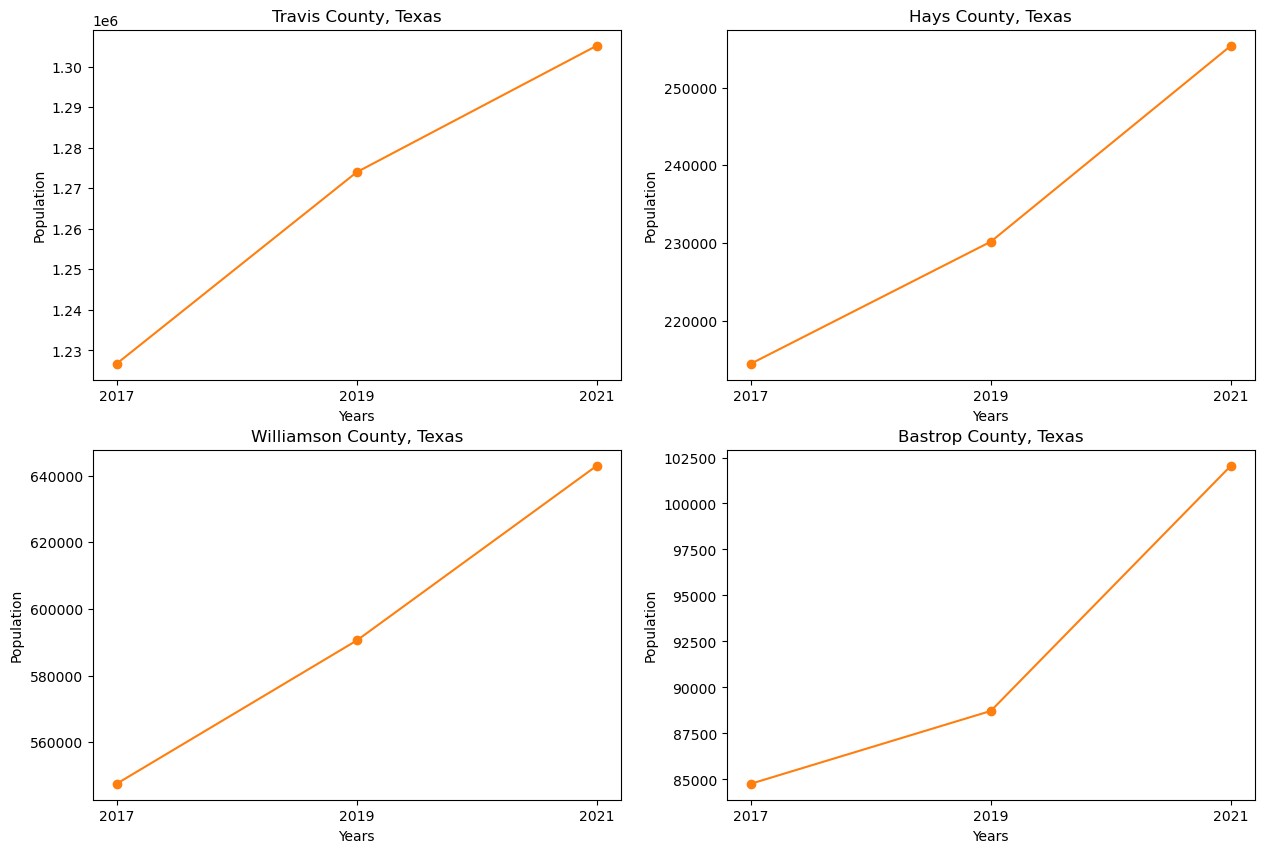

In [26]:
# Create Population Dataframe 
population_df  = census_combined_df[['Population 2017','Population 2019','Population 2021']].copy()


# Create 1 figure containing a scatterplot with regression lines for each county vs years

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Set the x values equal to the years
x = ['2017', '2019', '2021']
# Set the y values equal to the populations for each county 
y1 = population_df.loc['Travis County, Texas'].astype(int).tolist()
y2 = population_df.loc['Hays County, Texas'].astype(int).tolist()
y3 = population_df.loc['Williamson County, Texas'].astype(int).tolist()
y4 = population_df.loc['Bastrop County, Texas'].astype(int).tolist()

# Plot a graph for each county
axs[0,0].plot(x, y1, color ='tab:orange',marker = 'o')
axs[0,1].plot(x, y2, color ='tab:orange',marker = 'o')
axs[1,0].plot(x, y3,  color ='tab:orange',marker = 'o')
axs[1,1].plot(x, y4,  color ='tab:orange',marker = 'o')

# Set the labels and titles for each graph
axs[0,0].set_title('Travis County, Texas')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Population')

axs[0,1].set_title('Hays County, Texas')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Population')

axs[1,0].set_title('Williamson County, Texas')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('Population')

axs[1,1].set_title('Bastrop County, Texas')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('Population')

plt.show() 


In [27]:
# Create Median Income Dataframe 
median_income_df  = census_combined_df[['Median Income 2017','Median Income 2019','Median Income 2021']].copy().T
median_income_df.head()

Name,"Travis County, Texas","Hays County, Texas","Williamson County, Texas","Bastrop County, Texas"
Median Income 2017,38480,31877,37495,30819
Median Income 2019,41868,31769,40406,24706
Median Income 2021,46868,33453,46379,37132


In [33]:
# Create Race  Dataframe 
race_df  = census_combined_df[['Race: White 2017','Race: White 2019','Race: White 2021',
                    'Race: Black or African American 2017','Race: Black or African American 2019','Race: Black or African American 2021',
                    'Ethnicity: Hsipanic/Latino 2017', 'Ethnicity: Hsipanic/Latino 2019', 'Ethnicity: Hsipanic/Latino 2021',
                    'Race: Native American 2017','Race: Native American 2019','Race: Native American 2021',
                    'Race: Asian 2017','Race: Asian 2019','Race: Asian 2021',
                    'Race: Other 2017','Race: Other 2019','Race: Other 2021',
                    'Race: Two or more races 2017','Race: Two or more races 2019','Race: Two or more races 2021'
                   ]].copy().T

race_df = race_df.rename(index={'Race: White 2017': 'White (2017)',
                                  'Race: White 2019': 'White (2019)',
                                  'Race: White 2021': 'White (2021)',
                                  'Race: Black or African American 2017': 'Afri-Am (2017)',
                                  'Race: Black or African American 2019': 'Afri-Am (2019)',
                                  'Race: Black or African American 2021': 'Afri-Am (2021)',
                                  'Ethnicity: Hsipanic/Latino 2017': 'Hispanic/Latino (2017)', 
                                  'Ethnicity: Hsipanic/Latino 2019': 'Hispanic/Latino (2019)', 
                                  'Ethnicity: Hsipanic/Latino 2021': 'Hispanic/Latino (2021)',
                                  'Race: Native American 2017': 'Native-Am (2017)',
                                  'Race: Native American 2019': 'Native-Am (2019)',
                                  'Race: Native American 2021': 'Native-Am (2021)',
                                  'Race: Asian 2017': 'Asian 2017 (2017)',
                                  'Race: Asian 2019': 'Asian 2017 (2019)',
                                  'Race: Asian 2021': 'Asian 2017 (2021)',
                                  'Race: Other 2017': 'Other (2017)',
                                  'Race: Other 2019': 'Other (2019)',
                                  'Race: Other 2021': 'Other (2021)',
                                  'Race: Two or more races 2017': 'Two or more (2017)',
                                  'Race: Two or more races 2019': 'Two or more (2019)',
                                  'Race: Two or more races 2021': 'Two or more (2021)',
                                 })
race_df.fillna(0, inplace=True)
race_df

Name,"Travis County, Texas","Hays County, Texas","Williamson County, Texas","Bastrop County, Texas"
White (2017),866322,187859,435271,60565
White (2019),920247,204010,469151,57372
White (2021),717362,149132,387893,58879
Afri-Am (2017),101281,9325,32555,7170
Afri-Am (2019),104062,9776,40399,5334
Afri-Am (2021),102957,8401,42188,4262
Hispanic/Latino (2017),1226698,0,547545,0
Hispanic/Latino (2019),1273954,0,0,0
Hispanic/Latino (2021),1305154,0,643026,0
Native-Am (2017),7940,1137,1333,295


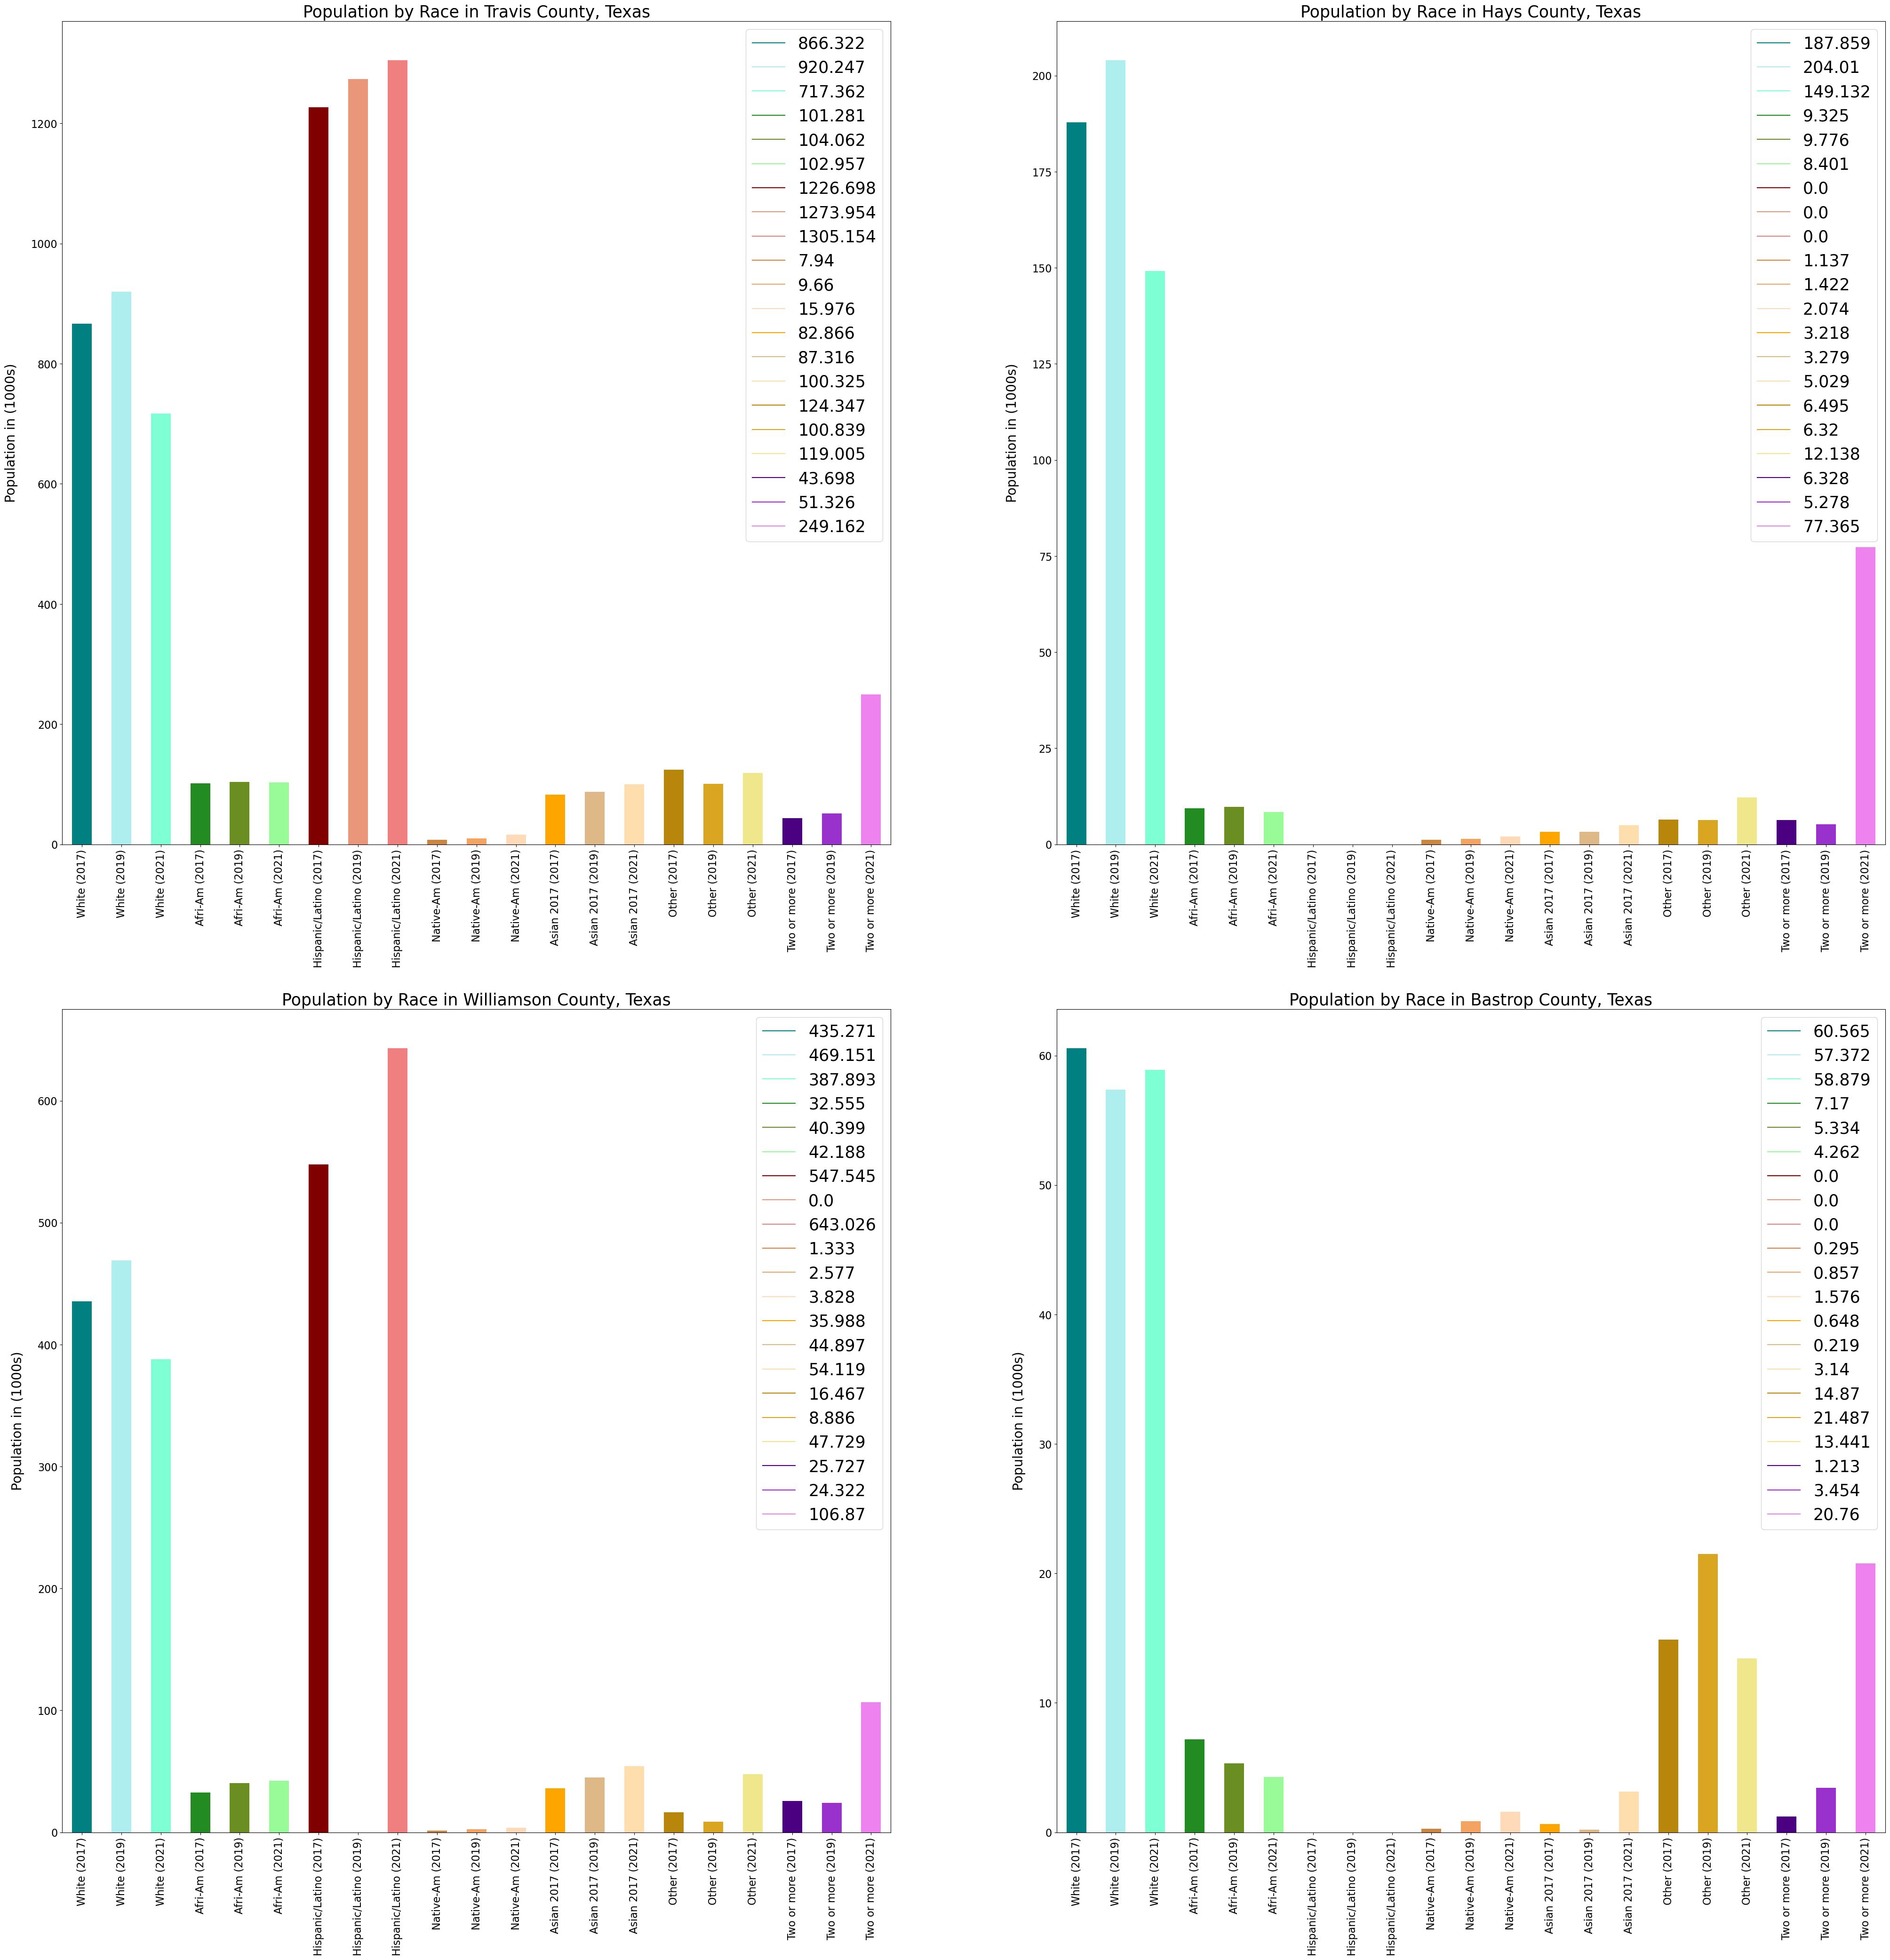

In [67]:
# store the population per county
travis_c = race_df['Travis County, Texas'].astype(int)
hayes_c = race_df['Hays County, Texas'].astype(int)
will_c = race_df['Williamson County, Texas'].astype(int)
bast_c = race_df['Bastrop County, Texas'].astype(int)

# set the colors for the bars
colors =['teal', 'paleturquoise', 'aquamarine',
         'forestgreen', 'olivedrab', 'palegreen',
         'maroon', 'darksalmon', 'lightcoral',
         'peru', 'sandybrown', 'peachpuff',
         'orange', 'burlywood', 'navajowhite',
         'darkgoldenrod', 'goldenrod', 'khaki',
         'indigo', 'darkorchid', 'violet',]

# plot
fig, axs = plt.subplots(2, 2, figsize=(50, 50))

# travis county
travis_c = travis_c / 1000
travis_c.plot.bar(ax=axs[0,0], color=colors)
axs[0,0].set_title('Population by Race in Travis County, Texas', fontsize=25)
axs[0,0].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[0,0].tick_params(axis='both', labelsize=16)
# legend
label_tc = list(travis_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_tc)]
axs[0, 0].legend(handles=legend_elements, loc='upper right', fontsize=25)

# hays county
hayes_c = hayes_c / 1000
hayes_c.plot.bar(ax=axs[0,1], color=colors)
axs[0,1].set_title('Population by Race in Hays County, Texas', fontsize=25)
axs[0,1].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[0,1].tick_params(axis='both', labelsize=16)
# legend
label_h = list(hayes_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_h)]
axs[0, 1].legend(handles=legend_elements, loc='upper right', fontsize=25)

# williamson county
will_c = will_c / 1000
will_c.plot.bar(ax=axs[1,0], color=colors)
axs[1,0].set_title('Population by Race in Williamson County, Texas', fontsize=25)
axs[1,0].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[1,0].tick_params(axis='both', labelsize=16)
# legend
label_will = list(will_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_will)]
axs[1, 0].legend(handles=legend_elements, loc='upper right', fontsize=25)

# bastrop county
bast_c = bast_c / 1000
bast_c.plot.bar(ax=axs[1,1], color=colors)
axs[1,1].set_title('Population by Race in Bastrop County, Texas', fontsize=25)
axs[1,1].set_ylabel('Population in (1000s)', fontsize=20, labelpad=20)
axs[1,1].tick_params(axis='both', labelsize=16)
# legend
label_ba = list(bast_c)
legend_elements = [plt.Line2D([0], [0], color=color, label=label) for color, label in zip(colors, label_ba)]
axs[1, 1].legend(handles=legend_elements, loc='upper right', fontsize=25)

plt.show() 